# <center><font color='Blue' face='comic sans ms'> Weather Prediction </font></center> 
# <center><font color='Purple' face='comic sans ms'> Depending on .. </font></center> 

<b>Problem on Hand: </b> Develop a machine learning model to accurately forecast weather conditions using historical data, providing users with reliable predictions for planning their activities.</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

## <font color='Blue' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [3]:
weath_org=pd.read_csv("seattle-weather.csv")
weath_org.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


## <font color='Blue' face='Cursive'> Data Cleaning and Preparation</font>

In [4]:
weath_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


- <font color = 'Magenta'> There are  1461 rows in the data set</font>
 - <font color = 'Magenta'> There are 6 columns in the data set provided</font>
 - <font color = 'Magenta'> All the columns are of type Object.</font>
 


In [5]:
#create the copy of the data set
weath_cpy=weath_org.copy()

In [6]:
weath_cpy.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [7]:
#removing leading and trailing edges
weath_cpy.columns=weath_cpy.columns.str.strip()

#After removing column stripping
print("After Removing column strips spaces ",weath_cpy.columns)

After Removing column strips spaces  Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [8]:
weath_cpy.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<font color = 'Green'> Let us check [value counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) for all columns</font>

In [10]:
weath_cpy.precipitation.value_counts()

precipitation
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: count, Length: 111, dtype: int64

In [11]:
weath_cpy.temp_max.value_counts()

temp_max
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: count, Length: 67, dtype: int64

In [12]:
weath_cpy.temp_min.value_counts()

temp_min
 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: count, dtype: int64

In [13]:
weath_cpy.wind.value_counts()

wind
2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: count, Length: 79, dtype: int64

In [14]:
weath_cpy.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<font color = 'green'> Trimming all categorical columns to make sure there are no leading and trailing spacces and no double space between Words </font>

In [15]:
weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).strip().replace("  "," "))



<font color = 'Green'> It can also be seen that some of the job titles are in Upper case. so with Lowe and with mix of both which might effect analysis, so converting them to  uppercase</font>

In [16]:

weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).upper())
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).upper())
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).upper())
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).upper())
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).upper())
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).upper())

In [17]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,DRIZZLE
1,2012-01-02,10.9,10.6,2.8,4.5,RAIN
2,2012-01-03,0.8,11.7,7.2,2.3,RAIN
3,2012-01-04,20.3,12.2,5.6,4.7,RAIN
4,2012-01-05,1.3,8.9,2.8,6.1,RAIN
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,RAIN
1457,2015-12-28,1.5,5.0,1.7,1.3,RAIN
1458,2015-12-29,0.0,7.2,0.6,2.6,FOG
1459,2015-12-30,0.0,5.6,-1.0,3.4,SUN


## <font color='Magenta' face='Cursive'>Exploratory Data Analysis</font>

Visualizing the dataset
In this step, we will conduct the analysis of the variables in the data set that we have collected above.

First, we will start from the variable weather with the weather classification conditions.

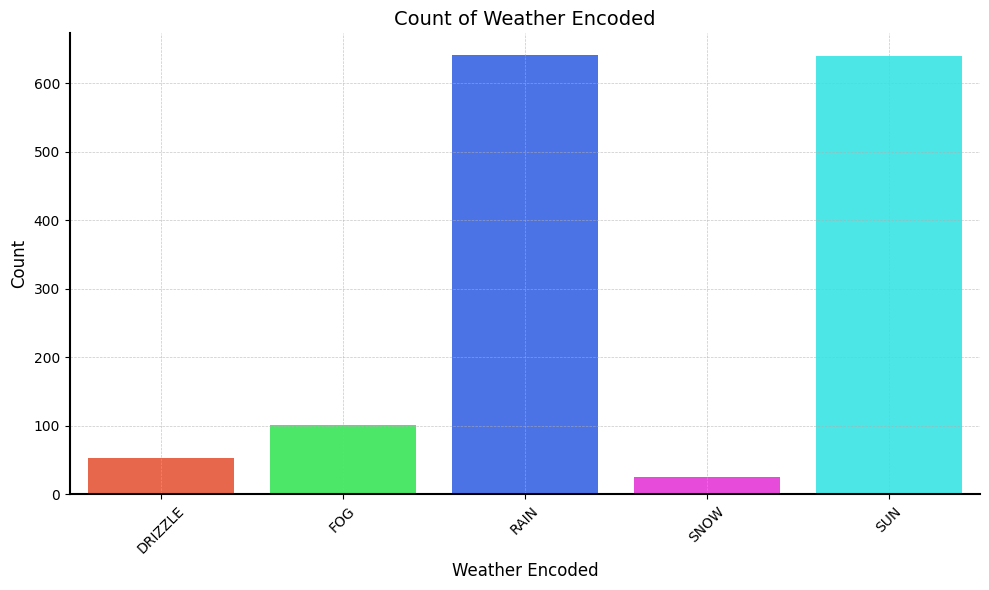

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming you have loaded your dataset into a DataFrame named weath_org
# Replace this ellipsis (...) with your actual DataFrame
weath_org =weath_cpy.copy()

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
weath_org['weather_encoded'] = le.fit_transform(weath_org['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))

# Custom color palette
custom_palette = ["#FF5733", "#33FF57", "#3366FF", "#FF33EE", "#33FFFF"]

# Plot the count of each unique value in the weather column with actual names on the labels
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.countplot(x='weather_encoded', data=weath_org, palette=custom_palette)

# Set proper labels for axes and title
plt.xlabel('Weather Encoded', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Weather Encoded', fontsize=14)

# Set names for each bar
ax.set_xticklabels(weather_names.keys(), rotation=45, fontsize=10)

# Customize grid appearance
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Customize spines
ax.spines['top'].set_linewidth(0)  
ax.spines['right'].set_linewidth(0)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [19]:
# Get the value counts of each unique value in the weather column
weather_counts = weath_cpy['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(weath_cpy)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [20]:
weath_cpy[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461,1461,1461,1461
unique,111,67,55,79
top,0.0,11.1,6.1,2.6
freq,838,58,66,76


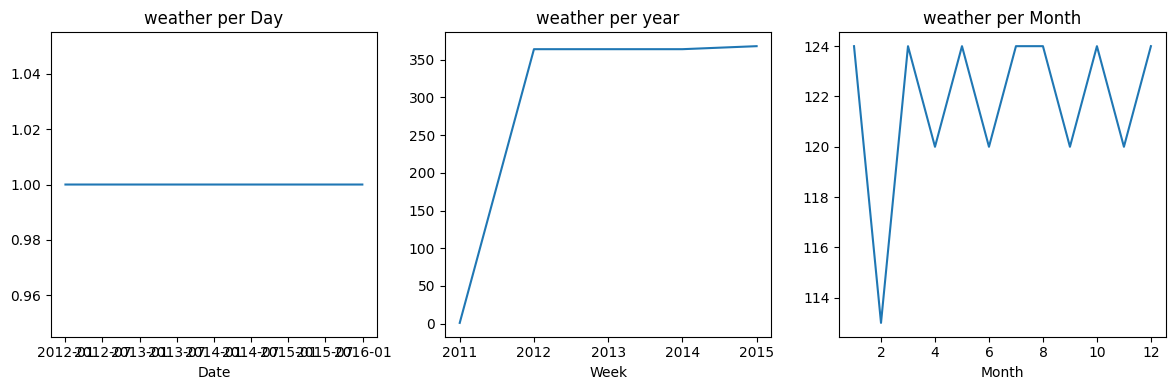

In [21]:
# Convert 'review_date' column to datetime type
weath_cpy['date'] = pd.to_datetime(weath_cpy['date'])

# Extract week and month from 'date'
weath_cpy['year'] = weath_cpy['date'].dt.isocalendar().year
weath_cpy['month'] = weath_cpy['date'].dt.month

# Number of reviews per day
weather_per_day = weath_cpy['date'].value_counts().sort_index()

# Number of reviews per week
weather_per_year = weath_cpy['year'].value_counts().sort_index()

# Number of reviews per month
weather_per_month = weath_cpy['month'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(weather_per_day.index, weather_per_day.values)
plt.title('weather per Day')
plt.xlabel('Date')

plt.subplot(132)
plt.plot(weather_per_year.index, weather_per_year.values)
plt.title('weather per year')
plt.xlabel('Week')

plt.subplot(133)
plt.plot(weather_per_month.index, weather_per_month.values)
plt.title('weather per Month')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


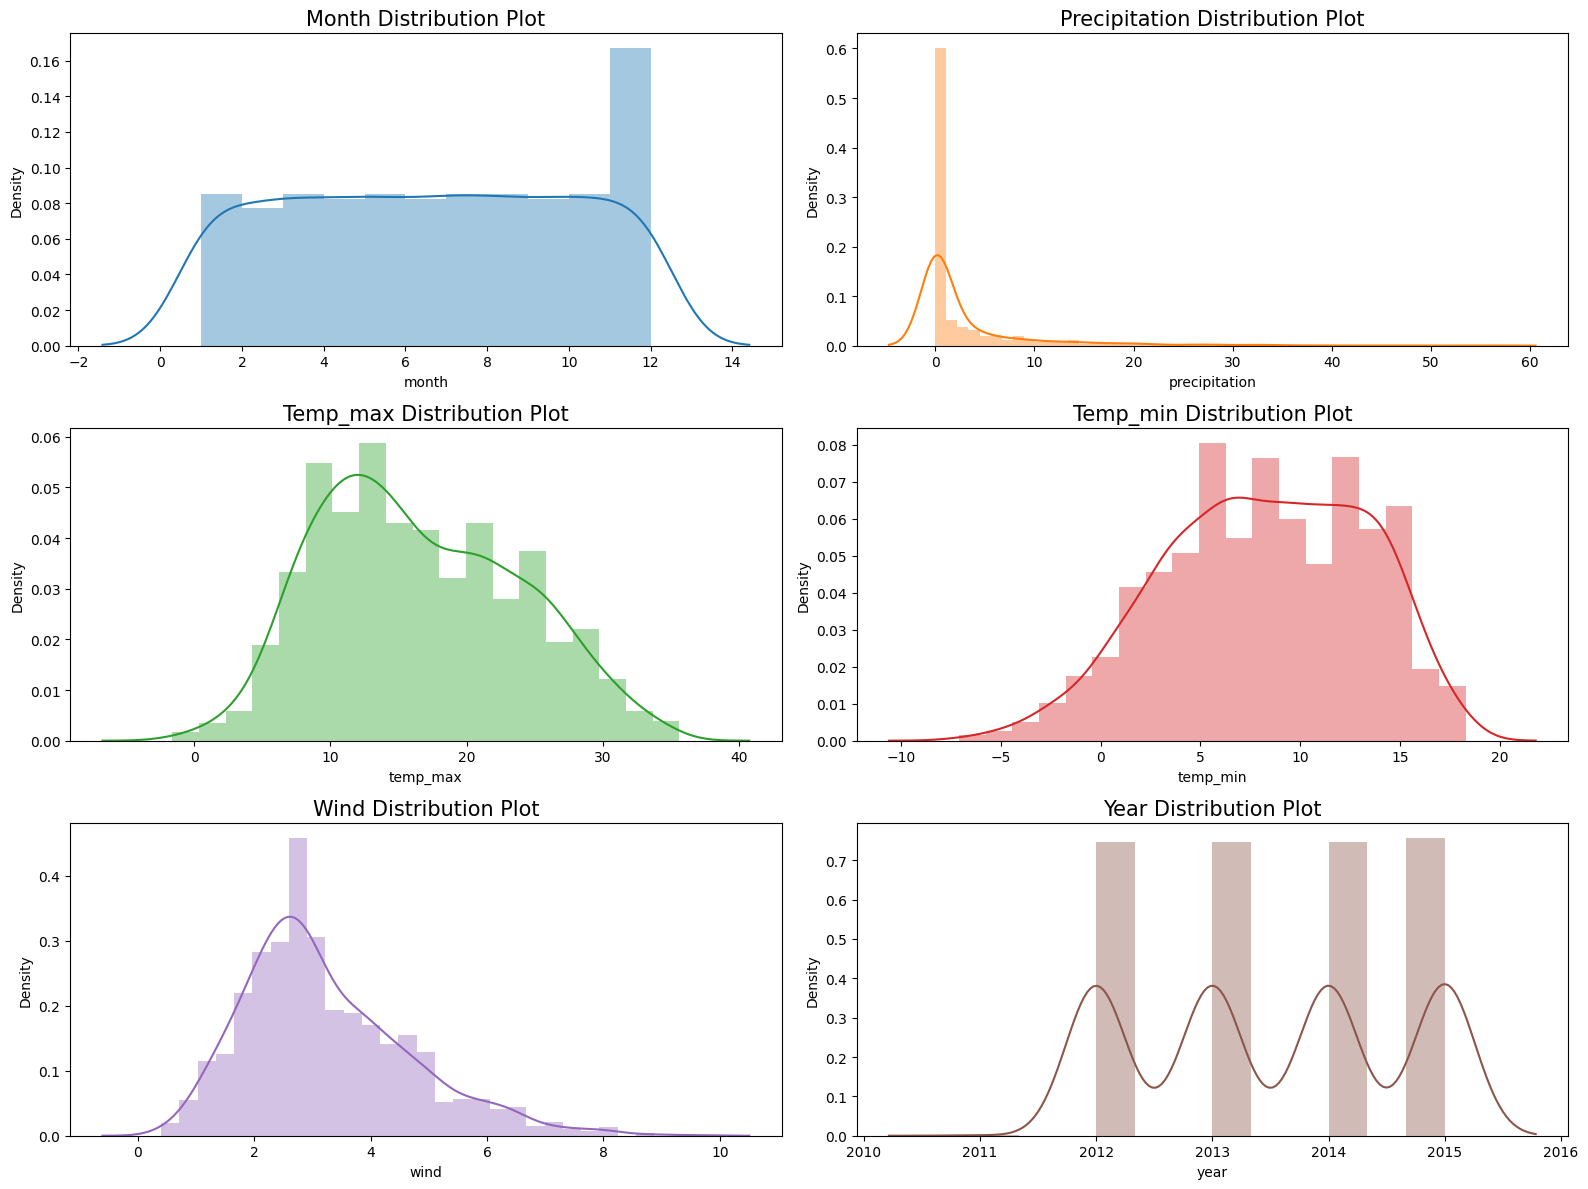

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'weath_cpy' is your dataset
# Replace this with your actual dataset

# Define colors for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create subplots for each distribution plot
plt.figure(figsize=(16, 12))

# Plot month distribution
plt.subplot(3, 2, 1)
sns.distplot(weath_cpy['month'], color=colors[0])
plt.title("Month Distribution Plot", fontsize=15)

# Plot precipitation distribution
plt.subplot(3, 2, 2)
sns.distplot(weath_cpy['precipitation'], color=colors[1])
plt.title("Precipitation Distribution Plot", fontsize=15)

# Plot temp_max distribution
plt.subplot(3, 2, 3)
sns.distplot(weath_cpy['temp_max'], color=colors[2])
plt.title("Temp_max Distribution Plot", fontsize=15)

# Plot temp_min distribution
plt.subplot(3, 2, 4)
sns.distplot(weath_cpy['temp_min'], color=colors[3])
plt.title("Temp_min Distribution Plot", fontsize=15)

# Plot wind distribution
plt.subplot(3, 2, 5)
sns.distplot(weath_cpy['wind'], color=colors[4])
plt.title("Wind Distribution Plot", fontsize=15)

# Plot year distribution
plt.subplot(3, 2, 6)
sns.distplot(weath_cpy['year'], color=colors[5])
plt.title("Year Distribution Plot", fontsize=15)

plt.tight_layout()
plt.show()


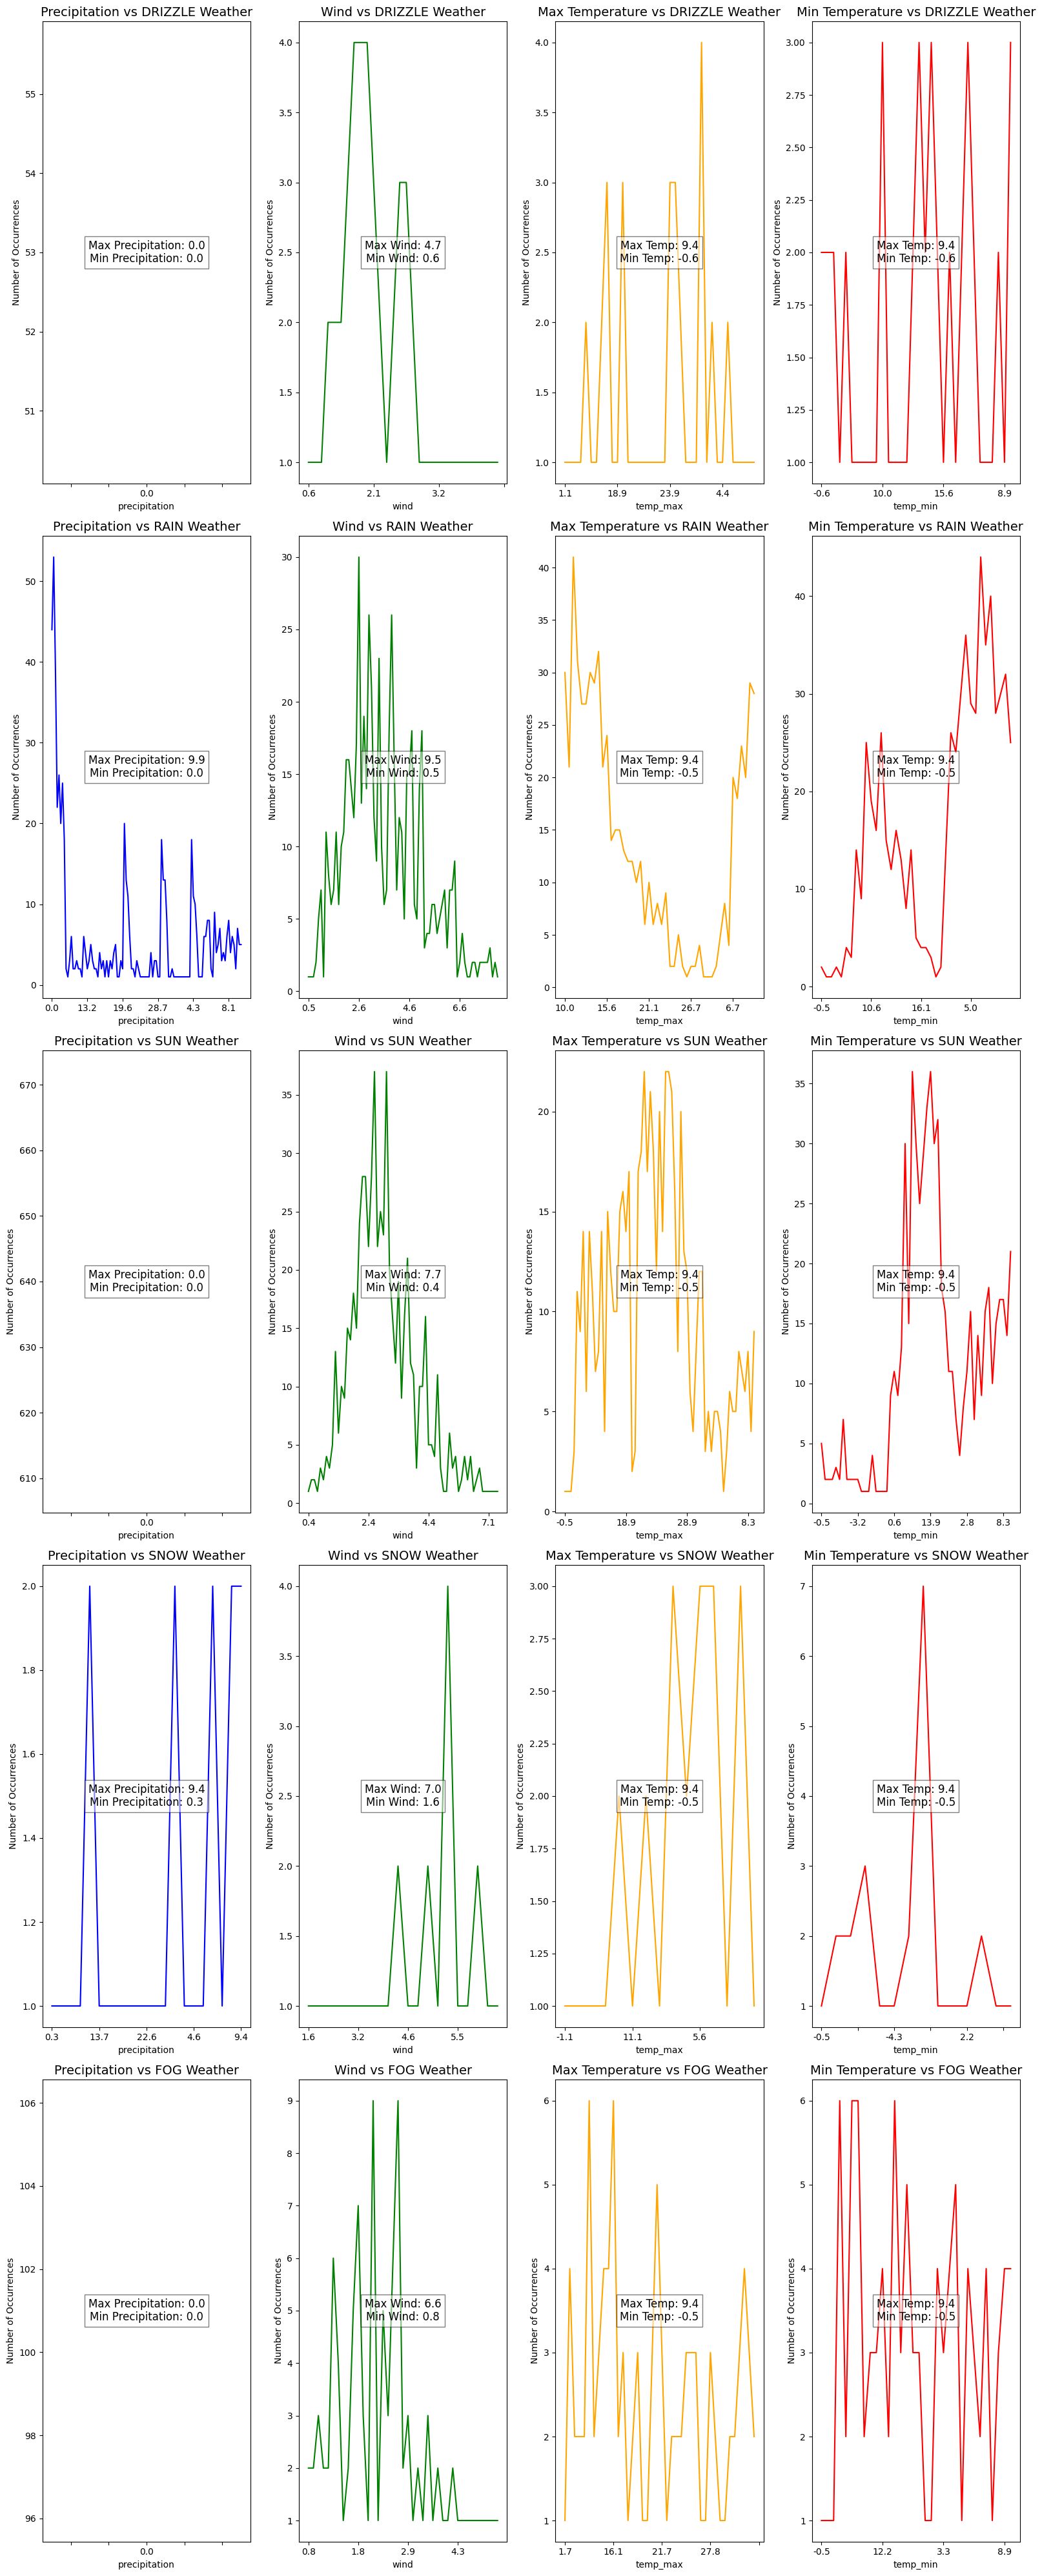

In [23]:
import matplotlib.pyplot as plt

# Get unique weather conditions
unique_weather_conditions = weath_cpy['weather'].unique()

# Set up subplots
fig, axs = plt.subplots(len(unique_weather_conditions), 4, figsize=(16, 8*len(unique_weather_conditions)))

# Iterate over each unique weather condition
for i, weather_condition in enumerate(unique_weather_conditions):
    # Subset data for the current weather condition
    weather_data = weath_cpy[weath_cpy['weather'] == weather_condition]

    # Plot precipitation
    weather_data.groupby(['precipitation']).size().plot(ax=axs[i, 0], color='blue')
    axs[i, 0].set_ylabel('Number of Occurrences')
    axs[i, 0].set_title(f"Precipitation vs {weather_condition} Weather", fontsize=14)

    # Plot wind
    weather_data.groupby(['wind']).size().plot(ax=axs[i, 1], color='green')
    axs[i, 1].set_ylabel('Number of Occurrences')
    axs[i, 1].set_title(f"Wind vs {weather_condition} Weather", fontsize=14)

    # Plot max temperature
    weather_data.groupby(['temp_max']).size().plot(ax=axs[i, 2], color='orange')
    axs[i, 2].set_ylabel('Number of Occurrences')
    axs[i, 2].set_title(f"Max Temperature vs {weather_condition} Weather", fontsize=14)

    # Plot min temperature
    weather_data.groupby(['temp_min']).size().plot(ax=axs[i, 3], color='red')
    axs[i, 3].set_ylabel('Number of Occurrences')
    axs[i, 3].set_title(f"Min Temperature vs {weather_condition} Weather", fontsize=14)

    # Add annotations for max and min values
    max_precipitation = weather_data['precipitation'].max()
    min_precipitation = weather_data['precipitation'].min()
    max_wind = weather_data['wind'].max()
    min_wind = weather_data['wind'].min()
    axs[i, 0].text(0.5, 0.5, f"Max Precipitation: {max_precipitation}\nMin Precipitation: {min_precipitation}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 0].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 1].text(0.5, 0.5, f"Max Wind: {max_wind}\nMin Wind: {min_wind}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 1].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 2].text(0.5, 0.5, f"Max Temp: {weather_data['temp_max'].max()}\nMin Temp: {weather_data['temp_min'].min()}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 2].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 3].text(0.5, 0.5, f"Max Temp: {weather_data['temp_max'].max()}\nMin Temp: {weather_data['temp_min'].min()}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 3].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,DRIZZLE,2011,1
1,2012-01-02,10.9,10.6,2.8,4.5,RAIN,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,RAIN,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,RAIN,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,RAIN,2012,1
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,RAIN,2015,12
1457,2015-12-28,1.5,5.0,1.7,1.3,RAIN,2015,12
1458,2015-12-29,0.0,7.2,0.6,2.6,FOG,2015,12
1459,2015-12-30,0.0,5.6,-1.0,3.4,SUN,2015,12


In [29]:

# Replace this with your actual DataFrame
weath_cpy['year'] = pd.to_datetime(weath_cpy['date']).dt.year

# Display the updated DataFrame
print(weath_cpy.head())


        date precipitation temp_max temp_min wind  weather  year  month
0 2012-01-01           0.0     12.8      5.0  4.7  DRIZZLE  2012      1
1 2012-01-02          10.9     10.6      2.8  4.5     RAIN  2012      1
2 2012-01-03           0.8     11.7      7.2  2.3     RAIN  2012      1
3 2012-01-04          20.3     12.2      5.6  4.7     RAIN  2012      1
4 2012-01-05           1.3      8.9      2.8  6.1     RAIN  2012      1


In [32]:
# Convert 'precipitation' column to numeric data type
weath_cpy['precipitation'] = pd.to_numeric(weath_cpy['precipitation'], errors='coerce')

# Calculate the average precipitation by year and weather
avg_precipitation_by_year = weath_cpy.groupby(['year', 'weather'])['precipitation'].mean()

# Check if there are any missing values in the 'precipitation' column
print(weath_cpy['precipitation'].isnull().sum())

# Check the unique values in the 'weather' column
print(weath_cpy['weather'].unique())

# Check the unique values in the 'year' column
print(weath_cpy['year'].unique())

# Calculate the average precipitation by year and weather
avg_precipitation_by_year = weath_cpy.groupby(['year', 'weather'])['precipitation'].mean()


0
['DRIZZLE' 'RAIN' 'SUN' 'SNOW' 'FOG']
[2012 2013 2014 2015]


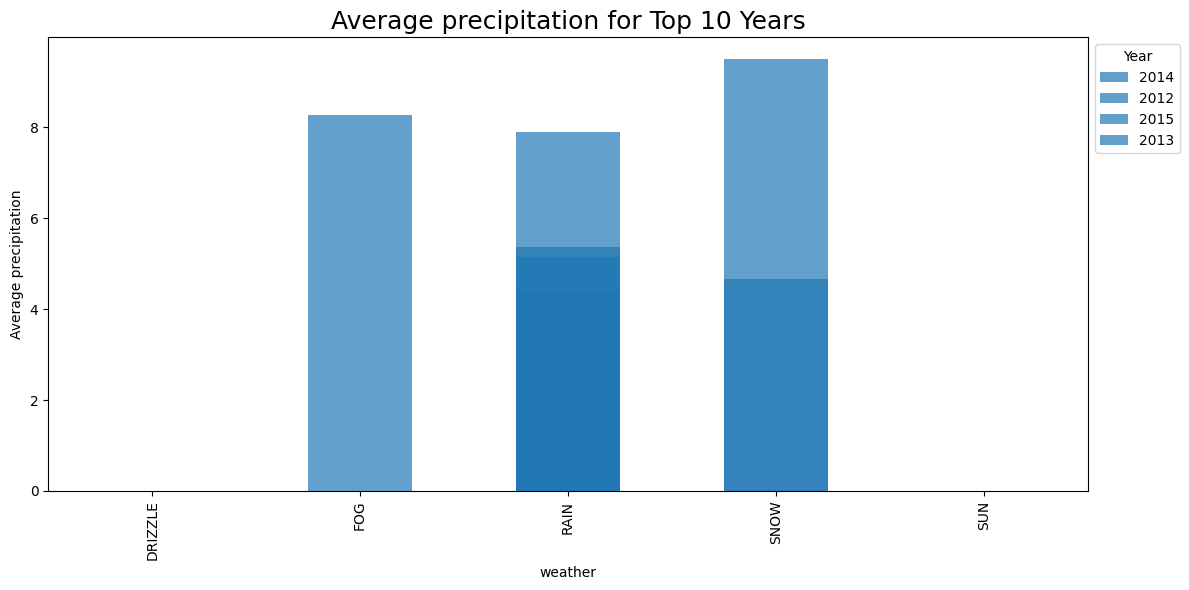

In [33]:
# Calculate the average production of crops for each crop year
avg_precipitation_by_year = weath_cpy.groupby(['year', 'weather'])['precipitation'].mean()

# Find the top 10 crop years with the highest average production
top_10_years = avg_precipitation_by_year.groupby('year').mean().nlargest(10)

# Plot the average production of crops for each of the top 10 crop years
plt.figure(figsize=(12, 6))
for year in top_10_years.index:
     avg_precipitation_by_year.loc[year].plot(kind='bar', alpha=0.7, label=year)

plt.xlabel('weather')
plt.ylabel('Average precipitation')
plt.title("Average precipitation for Top 10 Years", fontsize=18)
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

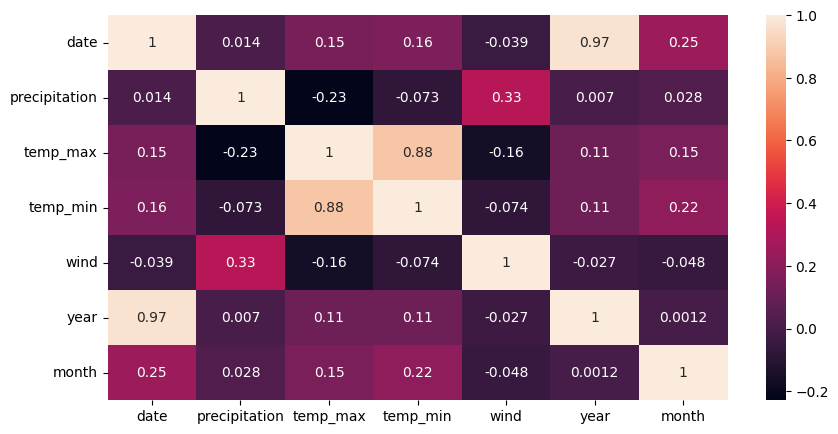

In [36]:
non_numeric_columns = ['weather']

# Drop non-numeric columns
weath_cy_numeric = weath_cpy.drop(columns=non_numeric_columns)

# Now, plot the heatmap using the numeric DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(weath_cy_numeric.corr(), annot=True)
plt.show()